<a href="https://colab.research.google.com/github/rhamiro94/AnalisisYCuracion/blob/master/Entregable_Parte_1_grupo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [ ]:
# Esenciales
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Visualizacion
import plotly
import seaborn as sns
sns.set_context('talk')

# Varios
import warnings
warnings.filterwarnings('ignore')

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## 1. Aspectos descriptivos

Antes de comenzar con las consignas del entregable, realizaremos un breve resumen de los aspectos descriptivos del dataset: su tamaño, las variables que contiene y tipo de datos que podemos encontrar. 

In [ ]:
print("Tamaño del dataset: ", melb_df.shape)

Tamaño del dataset:  (13580, 21)


In [ ]:
print("Columnas del dataset:\n ", list(melb_df.columns))

Columnas del dataset:
  ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


El dataset contiene 21 columnas, o variables. A continuación, una breve descripción de cada una de ellas y el tipo de datos que involucra: 

1. `Suburb`: barrio o zona en donde se ubica la propiedad // Tipo: STRING. 
2. `Address`: direccion de la propiedad // Tipo: STRING. 
3. `Rooms`: numero de habitaciones que tiene la propiedad // Tipo: INT.
4. `Type`: tipo de propiedad: h (house, cottage, villa, semi, terrace), u (unit, duplex) y t (towhhouse) // Tipo: STRING. 
5. `Price`: precio de la propiedad // Tipo: FLOAT. 
6. `Method`: metodo de venta de la propiedad: S (Propiedad Vendida), SP (Propiedad Pre Vendida), PI (propiedad vendida fuera del proceso de subasta por no superar el precio de base), VB (oferta del duenio) y SA (vendido luego de la subasta) // Tipo: STRING. 
7. `SellerG`: Agente vendedor // Tipo: STRING.
8. `Date`: fecha en que se vendio la propiedad. Datos desde julio de 2017 hasta septiembre de 2017 // Tipo: STRING (object).
9. `Distance`: distancia de la propiedad a la zona centrica comercial // Tipo: FLOAT.
10. `Regionname`: región a la que pertenece la propiedad // Tipo: STRING.
11. `Propertycount`: numero de propiedades que existen en el barrio // Tipo: FLOAT
12. `Postcode`: código postal de la propiedad // Tipo: FLOAT. 
13. `Bedroom2`: cantidad de dormitorios de la propiedad (variable obtenida mediante web scrapping de otro sitio) // Tipo: FLOAT. 
14. `Bathroom`: numero de baños que posee la propiedad // Tipo: FLOAT. 
15. `Car`: numero de estacionamientos que posee la propiedad // Tipo: FLOAT
16. `Landsize`: tamaño del lote // Tipo: FLOAT. 
17. `BuildingArea`: metros cuadrados cubiertos por la propiedad (superficie cubierta) // Tipo: FLOAT. 
18. `YearBuilt`: año en que se construyó la propiedad // Tipo: FLOAT. 
19. `CouncilArea`: Estado ("provincia") en que se encuentra la propiedad // Tipo: STRING. 
20. `Lattitude`: ubicación de la propiedad // Tipo: FLOAT. 
21. `Longtitude`: ubicación de la propiedad // Tipo: FLOAT.

De esta descripción surgen algunas observaciones, que posteriormente habrá que resolver: 
* `Date` es string y `YearBuilt` es float, pero ambas se relacionan con el tiempo, por lo tanto deberian ser del tipo datetime para poder darle un tratamiento apropiado. 
* `Postcode` es del tipo float, pero no lo tomaremos como un numero, es decir, no haremos las operaciones habituales de un numero con esta variable, de hecho es un identificador para cada propiedad, por lo tanto, deberiamos considerarlo como string. O, a lo sumo, no analizarlo como un "float".  
* `Propertycount`, `Bedroom2`, `Bathroom`, `Car` son variables del tipo "float" pero deberian ser del tipo `int` ya que no deberian asumir valores de tipo continuo sino ser variables discretas. 

Previo a realizar el desarrollo del Entregable, se realizará un cambio al "type" de estas variables, de manera tal que pueda darse su correcto tratamiento. 

In [ ]:
# Cambiamos el tipo de datos que contienen las variables: 
melb_df["Date"] = pd.to_datetime(melb_df["Date"])
melb_df["Postcode"] = melb_df["Postcode"].apply(lambda x: str(x))
melb_df["Propertycount"] = melb_df["Propertycount"].apply(lambda x: int(x))
melb_df["Bedroom2"] = melb_df["Bedroom2"].apply(lambda x: int(x))
melb_df["Bathroom"] = melb_df["Bathroom"].apply(lambda x: int(x))

## Ejercicio 1 

A fines de organizar esta sección de la forma mas clara posible, se colocarán las consignas e inmediatamente debajo de ellas el desarrollo correspondiente. 



### 1.1 Consigna 1. 

**Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades**. 

Previo a analizar los valores extremos, se hará un `describe()` de los datos, ya que nos dará una primera aproximación. Luego, para efectivamente constatar la presencia de valores extremos, graficaremos boxplot de las variables numericas en los cuales, los valores extremos son considerados aquellos que se encuentran fuera del limite minimo y maximo de la caja (los bigotes). 

In [ ]:
# Describe de los datos: 
melb_df.describe().round() 

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.0,13580.0,13580.0,13580.0,13580.0,13518.0,13580.0,7130.0,8205.0,13580.0,13580.0,13580.0
mean,3.0,1075684.0,10.0,3.0,2.0,2.0,558.0,152.0,1965.0,-38.0,145.0,7454.0
std,1.0,639311.0,6.0,1.0,1.0,1.0,3991.0,541.0,37.0,0.0,0.0,4379.0
min,1.0,85000.0,0.0,0.0,0.0,0.0,0.0,0.0,1196.0,-38.0,144.0,249.0
25%,2.0,650000.0,6.0,2.0,1.0,1.0,177.0,93.0,1940.0,-38.0,145.0,4380.0
50%,3.0,903000.0,9.0,3.0,1.0,2.0,440.0,126.0,1970.0,-38.0,145.0,6555.0
75%,3.0,1330000.0,13.0,3.0,2.0,2.0,651.0,174.0,1999.0,-38.0,145.0,10331.0
max,10.0,9000000.0,48.0,20.0,8.0,10.0,433014.0,44515.0,2018.0,-37.0,146.0,21650.0


Esta tabla nos permite realizar algunas observaciones: 

* El count nos permite saber si algunas de las variables numericas tiene valores faltantes, en este caso: Car, BuildingArea y YearBuilt. Pero no detendremos el análisis en este punto ya que en otra sección se profundizará. 
* Los valores minimos y máximos nos dan un indicio de la presencia de valores extremos ya que pueden exhibir algunos valores un tanto extraños. Tal es el caso de: 
    - `Bedroom2` cuyo máximo es de 20 habitaciones (lo cual parece demasiado) mientras que el máximo de `Rooms` que exhibe una propiedad es de 10. 
    - `Bathroom` exhibe un minimo de 0, es decir, una propiedad que no tiene baño y un máximo de 8 baños. Si bien puede existir una propiedad de gran tamaño, resulta extraño en relación a las habitaciones de la propiedad. 
    - `Landsize` representa el tamaño del lote por lo que resulta extraño que el valor minimo que asuma sea 0 y el valor maximo unos 433,014.0 mt2 (muy grande). 
    - `YearBuilt` tiene como valor minimo de construcción de una casa a 1196, demasiado antigua, lo que hace que se deba prestar atención. 

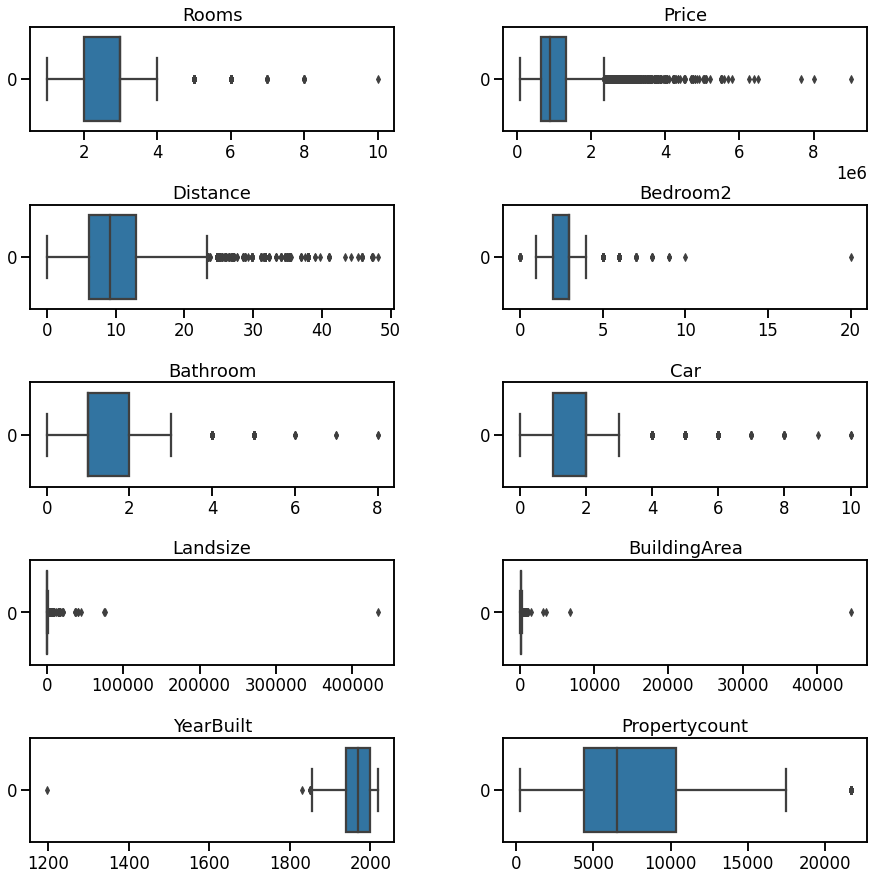

In [ ]:
# Realizamos un boxplot para las variables numericas: 
  # se quitan de la grafica las variables lattitude y longtitude ya que no tiene demasiado sentido analizarlas de esta manera

col_numeric = list(melb_df.select_dtypes(include = ["int64", "float64"]).drop(["Lattitude", "Longtitude"], axis = 1).columns)

row = 5
col = 2
i = 1 # inicia el conteo

fig = plt.figure(figsize=(15,15))

for columna in col_numeric:
  plt.subplot(row, col, i)
  plt.title(columna)
  sns.boxplot(data = melb_df[columna], orient = 'h')
  i += 1


plt.subplots_adjust(wspace = 0.3, hspace = 0.7) 
plt.show()

Tal como se observa en los boxplots, podemos verificar la presencia de outliers que sospechamos a partir de la tabla anterior. En particular, destaca la gran presencia de valores extremos en las variables `Price`, `Distance`, `Landsize` y `buildingarea`, donde en estas ultimas ni siquiera podemos ver la caja del boxplot. 

Una forma de lidiar con los valores faltantes es el criterio del desvio respecto a la media que consiste en que aquellos valores que superen el valor de la media mas/menos X desvios estandar, se quitaran del dataset. Para ello se define un limite inferior y otro superior que sirva como referencia para el filtro de valores. Sin embargo, este criterio solo se aplicará en algunas variables, ya que en casos como Landsize y BuildingArea que cuentan con numerosos valores faltantes y valore extremos, nos quitaria demasiados datos del dataframe y la perdida grande de información seria perjudicial para el análisis. 

Para evitar la mayor cantidad de perdida de datos se utiliza un criterio "blando" de 4 desvios respecto a la media, ya que al realizar el filtro sobre todas las variables, obtuvimos que se perdia demasiada información. Se decidió, en primera instancia, filtrar sólo las variables `Price`, `Rooms`, `Bathroom` y `Car` con el criterio anteriormente mencionado y a la variable `YearBuilt` con un criterio manual, a partir del análisis de las estadisticas descriptivas de la variable y los boxplots graficados. La selección de las variables a filtrar se justifica en el análisis gráfico y la cantidad de valores faltantes que exhiben. 


In [ ]:
# % Valores Faltantes de las variables

print("Porcentaje de valores NA BuildingArea: ", melb_df["BuildingArea"].isna().sum()/ len(melb_df["BuildingArea"])*100)
print("Porcentaje de valores NA YearBuilt: ", melb_df["YearBuilt"].isna().sum()/ len(melb_df["YearBuilt"])*100)
print("Porcentaje de valores NA YearBuilt: ", melb_df["CouncilArea"].isna().sum()/ len(melb_df["CouncilArea"])*100)

Porcentaje de valores NA BuildingArea:  47.49631811487481
Porcentaje de valores NA YearBuilt:  39.58026509572901
Porcentaje de valores NA YearBuilt:  10.08100147275405


In [ ]:
# Definimos los limites que corresponden a cada una de las variables segun criterio 4 desvios respecto la media. 

melb_df_num = melb_df[col_numeric]
sd_num=(4 * melb_df_num.std())
media_num=(melb_df_num.mean())
sd_ls=media_num+sd_num
sd_li=media_num-sd_num
print("Limite minimo para las variables: \n", sd_li.round())
print("\n")
print("Limite maximo para las variables: \n", sd_ls.round())


Limite minimo para las variables: 
 Rooms                 -1.0
Price           -1481559.0
Distance             -13.0
Bedroom2              -1.0
Bathroom              -1.0
Car                   -2.0
Landsize          -15404.0
BuildingArea       -2012.0
YearBuilt           1816.0
Propertycount     -10060.0
dtype: float64


Limite maximo para las variables: 
 Rooms                  7.0
Price            3632927.0
Distance              34.0
Bedroom2               7.0
Bathroom               4.0
Car                    5.0
Landsize           16521.0
BuildingArea        2316.0
YearBuilt           2114.0
Propertycount      24969.0
dtype: float64


Para algunas variables, los limites no tienen demasiado sentido, sin embargo, en estos casos, no afecta al filtro que realizaremos a nuestro dataset. Por ejemplo, en el caso de la variable `Price`, en la cual el limite inferior toma un valor negativo (lo cual no podria ocurrir), realmente no lo afecta porque todos los valores que puede asumir esta variable son efectivamente mayores que 0. 

In [ ]:
# Definimos la función que obtienen nuestros límites
def obtener_lim(data, col_name):
    sd_num=(4* data[col_name].std())
    media_num = data[col_name].mean()
    sd_ls = media_num + sd_num
    sd_li = media_num - sd_num
    return sd_ls, sd_li

# Definimos la funcion que filtra valores extremos: 
def remover_extremos(data, col_name):
    sd_ls, sd_li = obtener_lim(data, col_name)
    data_filtro = data[(data[col_name] > sd_li) & (data[col_name] < sd_ls)] 
    return data_filtro

In [ ]:
# Aplicamos la funcion a cada una de las variables descriptas anteriormente: 

melb_df_filtro = remover_extremos(melb_df, 'Price')
melb_df_filtro = remover_extremos(melb_df_filtro, 'Rooms')
melb_df_filtro = remover_extremos(melb_df_filtro, 'Bathroom')
melb_df_filtro = remover_extremos(melb_df_filtro, 'Car')
melb_df_filtro = melb_df_filtro[melb_df_filtro["YearBuilt"]!=1196]

In [ ]:
# Luego del filtrado, trabajamos con un dataset de tamaño: 

print("Tamaño del dataset filtrado por valores extremos: ", melb_df_filtro.shape)
print("Cantidad de datos eliminados: ", len(melb_df) - len(melb_df_filtro))
print("Porcentaje de valores eliminados: ", ((len(melb_df) - len(melb_df_filtro))/len(melb_df))*100)

Tamaño del dataset filtrado por valores extremos:  (13306, 21)
Cantidad de datos eliminados:  274
Porcentaje de valores eliminados:  2.0176730486008836


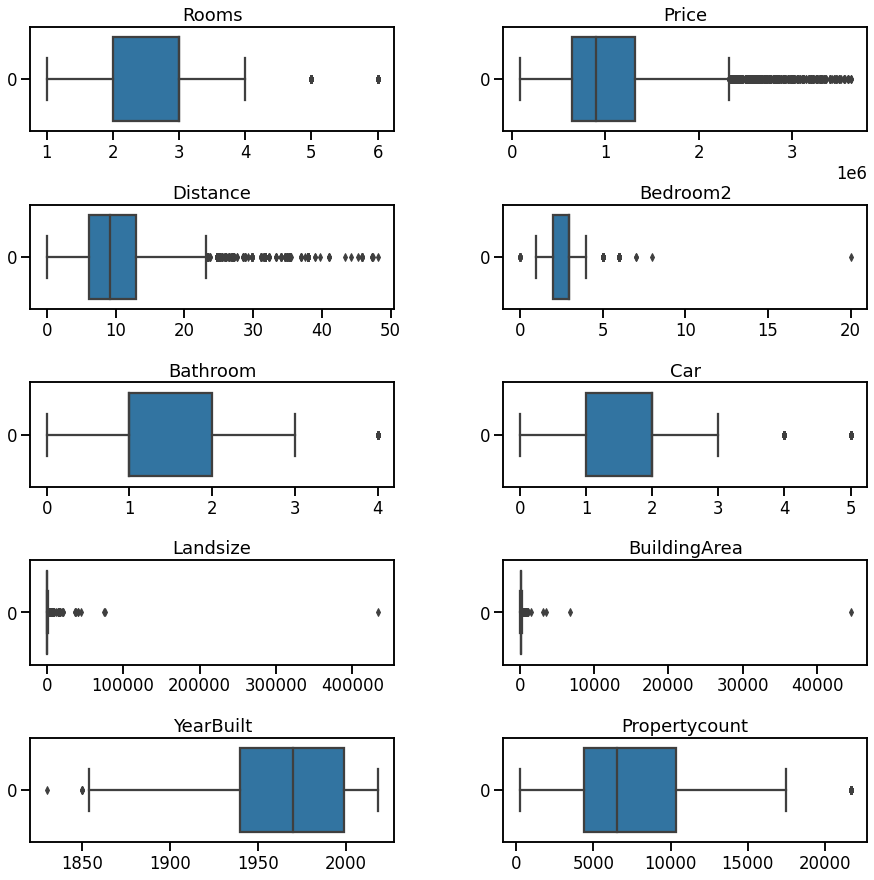

In [ ]:
# Graficamos nuevamente el boxplot de cada una de las variables numericas para saber como lucen las variables filtradas: 

row = 5
col = 2
i = 1 # inicia el conteo

fig = plt.figure(figsize=(15,15))

for columna in col_numeric:
  plt.subplot(row, col, i)
  plt.title(columna)
  sns.boxplot(data = melb_df_filtro[columna].values, orient = 'h')
  i += 1

plt.subplots_adjust(wspace = 0.3, hspace = 0.7) 
plt.show()


### 1.2 Consigna 2. 

**Investigar la distribución de las variables del conjunto de datos y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.**

En esta sección se realizará un análisis de la distribución de cada una de las variables y la relación que exhiben respecto al precio, con el objetivo de determinar si son relevantes para la predicción del precio de una propiedad y posteriormente proceder a una selección de las variables que pueden ser consideradas en la predicción. 

En los graficos debajo vemos que la variable objetivo `Price` esta sesgada a la izquierda y tiene una cola pesada hacia la derecha, asi como tambien lo es la distribución de `Distance`. El análisis de la distribución de `BuildingArea` y la de `Landsize` esta bastante afectada por los valores extremos que contiene, su centro es muy estrecho y las colas muy extendidas hacia la derecha ya que algunos valores extremos se encuentran muy lejos de la media. 

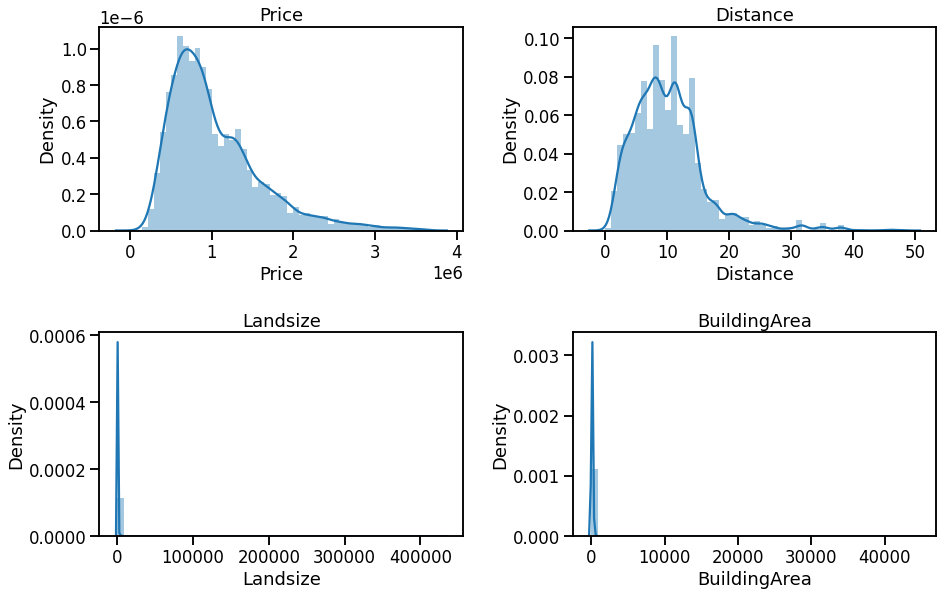

In [ ]:
# Distribucion de las variables numericas continuas: 
col_continue = list(melb_df.select_dtypes(include = ["float64"]).drop(["Car", "YearBuilt", "Lattitude", "Longtitude"], axis = 1).columns) 

row = 3
col = 2
i = 1 # inicia el conteo

fig = plt.figure(figsize=(15,15))

for columna in col_continue:
  plt.subplot(row, col, i)
  plt.title(columna)
  sns.distplot(melb_df_filtro[columna])
  i += 1


plt.subplots_adjust(wspace = 0.3, hspace = 0.5) 
plt.show()

Para visualizar la distribución de las variables discretas utilizaremos histogramas. 
`Rooms` parece tener una distribución similar a la normal luego de aplicarle el filtro, la mayor proporción se concentra en el valor 3.
Con `Bedrooom2`, `Bathroom` y `PropertyCount` se observan fenomenos similares, ambos concentran su distribución a la izquierda y tienen colas pesadas, con valores muy extremos, hacia la derecha.

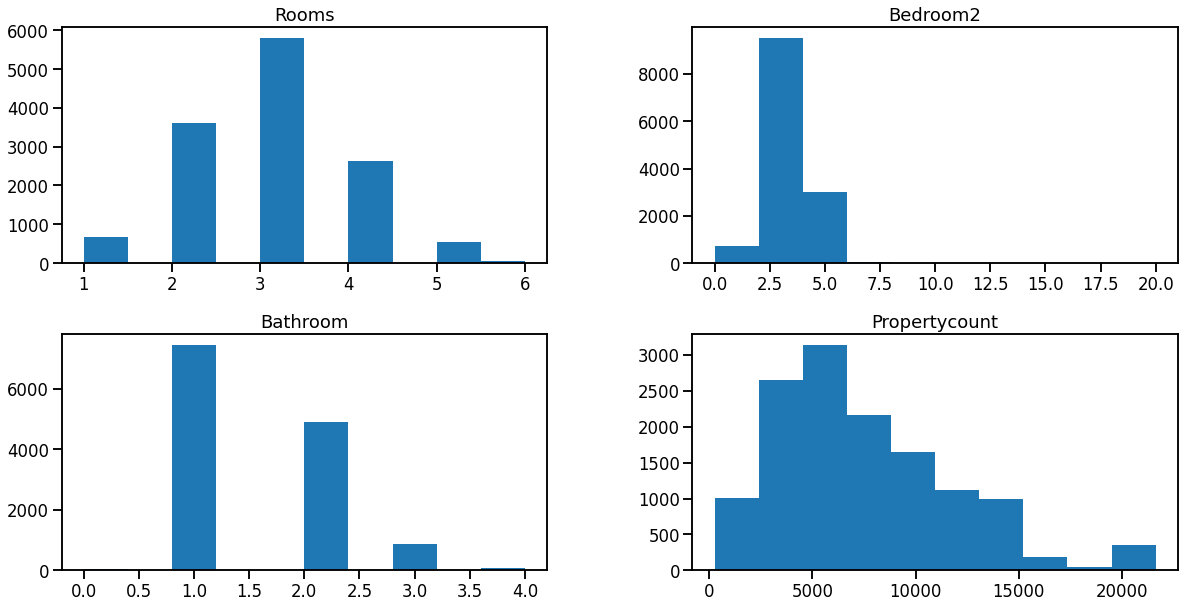

In [ ]:
# Graficamos un histograma para las variables discretas: 
col_discr = list(melb_df.select_dtypes(include = ["int64"]).columns)
row = 2
col = 2
i = 1 # inicia el conteo

fig = plt.figure(figsize=(20,10))

for columna in col_discr:
  plt.subplot(row, col, i)
  plt.title(columna)
  plt.hist(x = melb_df_filtro[columna])
  i += 1


plt.subplots_adjust(wspace = 0.3, hspace = 0.3) 
plt.show()

Debemos analizar si las variables con que contamos en el dataset son relevantes para predecir el precio de la propiedad y para ello contamos con las siguientes herramientas: 
1. Tabla de correlaciones. 
2. Análisis gráfico.

Esto con el fin de justificar la inclusión, o no, de ciertas variables en la consigna 3, pero además de explorar a mayor profundidad el conjunto de datos con que contamos. 

El primer punto que mencionamos es utilizar la **matriz de correlación** para saber la relación que las variables presentan con el precio y, en función de si esa correlación es alta, incluirlas en el análisis ya que serán importantes para explicar el precio de la propiedad. Pero tambien nos sirve para conocer la relación de las variables no solo con el precio, sino entre ellas.

In [ ]:
correlation_mat = melb_df_filtro[['Price','Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount', 'Distance']].corr()
correlation_mat

,Price,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,Distance
Price,1.000000,0.507546,-0.159741,0.486354,0.443357,0.231686,0.039040,0.087204,-0.356857,-0.050554,-0.159741
Rooms,0.507546,1.000000,0.307751,0.944986,0.584033,0.416179,0.024557,0.119894,-0.069862,-0.085309,0.307751
Distance,-0.159741,0.307751,1.000000,0.308938,0.140552,0.278739,0.025095,0.101010,0.248957,-0.057622,1.000000
Bedroom2,0.486354,0.944986,0.308938,1.000000,0.568868,0.410870,0.024506,0.118385,-0.056421,-0.085137,0.308938
Bathroom,0.443357,0.584033,0.140552,0.568868,1.000000,0.320582,0.037787,0.106982,0.166797,-0.058804,0.140552
Car,0.231686,0.416179,0.278739,0.410870,0.320582,1.000000,0.026348,0.097599,0.133710,-0.036223,0.278739
Landsize,0.039040,0.024557,0.025095,0.024506,0.037787,0.026348,1.000000,0.503240,0.042065,-0.006895,0.025095
BuildingArea,0.087204,0.119894,0.101010,0.118385,0.106982,0.097599,0.503240,1.000000,0.015106,-0.029538,0.101010
YearBuilt,-0.356857,-0.069862,0.248957,-0.056421,0.166797,0.133710,0.042065,0.015106,1.000000,0.011463,0.248957
Propertycount,-0.050554,-0.085309,-0.057622,-0.085137,-0.058804,-0.036223,-0.006895,-0.029538,0.011463,1.000000,-0.057622


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap( 
                       z=correlation_mat,
                       x=['Price','Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'YearBuilt', 'Propertycount'],
                       y=['Price','Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'YearBuilt', 'Propertycount'],
                       colorscale='Inferno'))

fig.show()

Si nos enfocamos en la ultima fila de la matriz, aquella que indica la correlación de cada variable con el precio, podemos realizar las observaciones: 

* La variable `Rooms` y `Bedroom2` presentan la correlación más alta con el precio, de 0.505 y 0.48, respectivamente. Pero, a su vez, la correlación entre ellas es muy alta (de 0.94), por lo tanto, se podria omitir alguna del dataset ya que aportarian información similar. Debido a que `Bedroom2` proviene de otro sitio y que la correlación más alta la tiene `Rooms`, se eliminará `Bedroom2`. 

  Además, si observamos los gráficos en donde se presenta a cada variable respecto a precio, Bedroom2 presenta un comportamiento un tanto más extraño que Rooms, que tambien presenta algunos puntos extraños. 
  La matriz de correlación (y la intuición) nos indica que mientras mayor sea el numero de habitaciones de una propiedad (o dormitorios), mayor será su precio. Sin embargo, en ambos graficos vemos que esto no se verifica en todos los casos. En el caso de `Rooms` esto se verifica hasta 5 habitaciones y luego el precio incluso en una propiedad de 10 habitaciones es mas bajo que en una de 1. En el caso de Bedrooms, esta relación tambien se verifica hasta 5 habitaciones (exceptuando el caso de 0 habitaciones, quizas un monoambiente, mas caro que una propiedad de 2). 

 

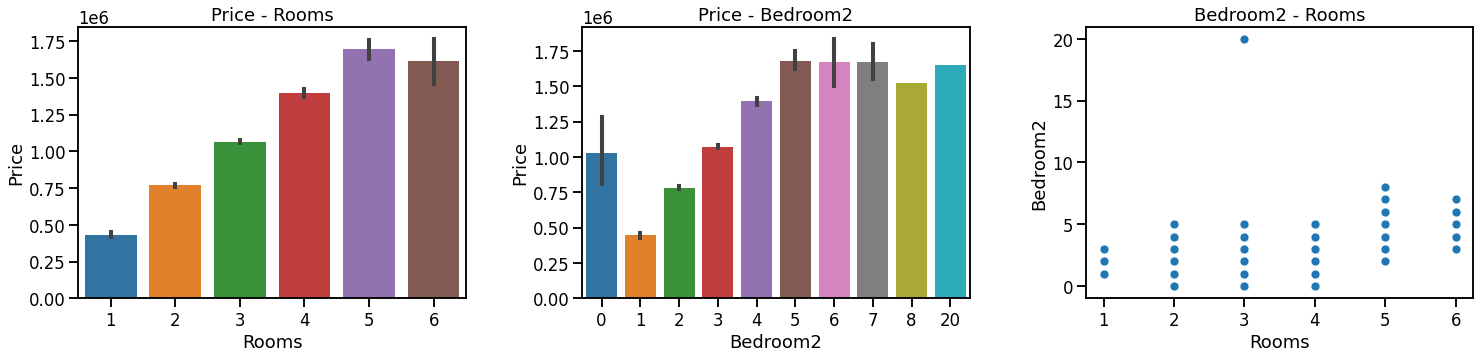

In [ ]:
# Rooms y Bedroom2: 
fig = plt.figure(figsize=(25,5))

plt.subplot(1, 3, 1)
sns.barplot(x = melb_df_filtro["Rooms"], y = melb_df_filtro["Price"])
plt.title("Price - Rooms")

plt.subplot(1, 3, 2)
sns.barplot(x = melb_df_filtro["Bedroom2"], y = melb_df_filtro["Price"])
plt.title("Price - Bedroom2")

plt.subplot(1,3,3)
sns.scatterplot(x = melb_df_filtro["Rooms"], y = melb_df_filtro["Bedroom2"])
plt.title("Bedroom2 - Rooms")

plt.subplots_adjust(wspace = 0.3, hspace = 0.3) 
plt.show()

* La variable `Bathroom` presenta una correlación alta con el precio (0.44), lo que indicaria que a medida que aumenta la cantidad de baños en la propiedad, su precio es mayor.

  El hecho de que haya una propiedad con cero baños nos hace pensar que puede ser un error (quizás este valor corresponderia a un dato faltante)


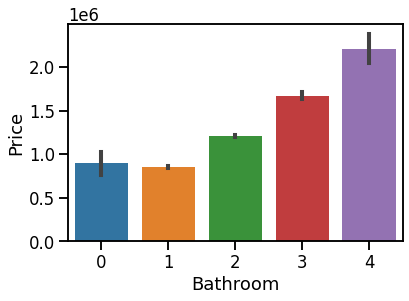

In [ ]:
# Bathroom: 
sns.barplot(x = melb_df_filtro["Bathroom"], y = melb_df_filtro["Price"])

* La variable `YearBuilt` exhibe una correlación negativa con el precio (-0.35), lo que indicaria que mientras mas reciente sea construida la propiedad, mayor sera su precio. Esta relación no se aprecia demasiado claro en los graficos ya que la correlación no es elevada, sin embargo, creemos que aportará información valiosa al análisis y se mantendrá. 


In [ ]:
melb_df_filtro["YearBuilt"] = melb_df_filtro["YearBuilt"].fillna(0).astype(int)
melb_df_filtro["YearBuilt"] = pd.to_datetime(melb_df_filtro["YearBuilt"], format = "%Y", errors='coerce')

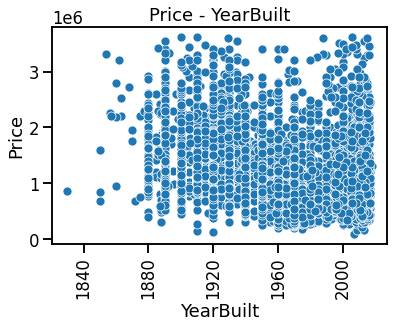

In [ ]:
# YearBuilt:

sns.scatterplot(x = melb_df_filtro["YearBuilt"], y = melb_df_filtro["Price"])
plt.xticks(rotation = 90)
plt.title("Price - YearBuilt")

plt.show()

* La variable `Car` presenta una correlación positiva baja (0.23) con el precio, es de esperar que mientras mas lugares de estacionamiento tenga una propiedad, su precio sea mayor, sin embargo, esta relación no es demasiado clara en todos los casos. Tal como se observa en el grafico, no necesariamente una propiedad con mas estacionamientos es mas cara que otra con menos (caso de 0 lugares disponibles vs 1 lugar disponible), existen otros factores que son mas relevantes para explicar el mayor precio. Sin embargo, por el momento consideramos oportuno dejarla en el analisis.

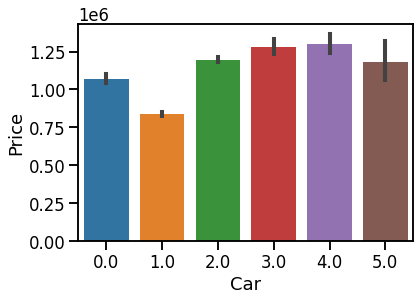

In [ ]:
# Car: 
sns.barplot(x = melb_df_filtro["Car"], y = melb_df_filtro["Price"])

* La variable `Distance` tiene una relación inversa con el precio, mientras mayor sea la distancia de la propiedad al centro (distrito comercial), menor sera su precio ya que se encuentra mas alejada de la ciudad. Sin embargo, la correlación observada es baja, de -0.15, por lo que no será demasiado clara esta intuición. 

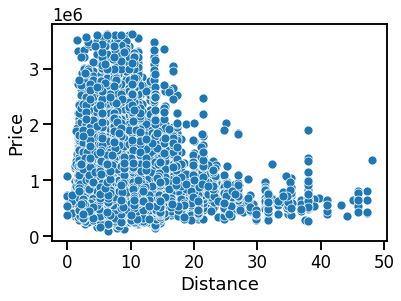

In [ ]:
sns.scatterplot(data = melb_df_filtro, x = "Distance", y = "Price")

* Las variables `BuildingArea` y `Landsize` no estan correlacionadas con el precio ya que los valores observados en la matriz son muy cercanos a cero (de 0.09 y 0.04, respectivamente). Quizás esto este relacionado con que exhiben numerosos valores extremos, lo que distorsiona el análisis de estas variables. A fin de evitar la gran perdida de datos que conllevaria su limpieza y, dado que de esta manera las variables no aportan información relevante, se quitarán del analisis. 

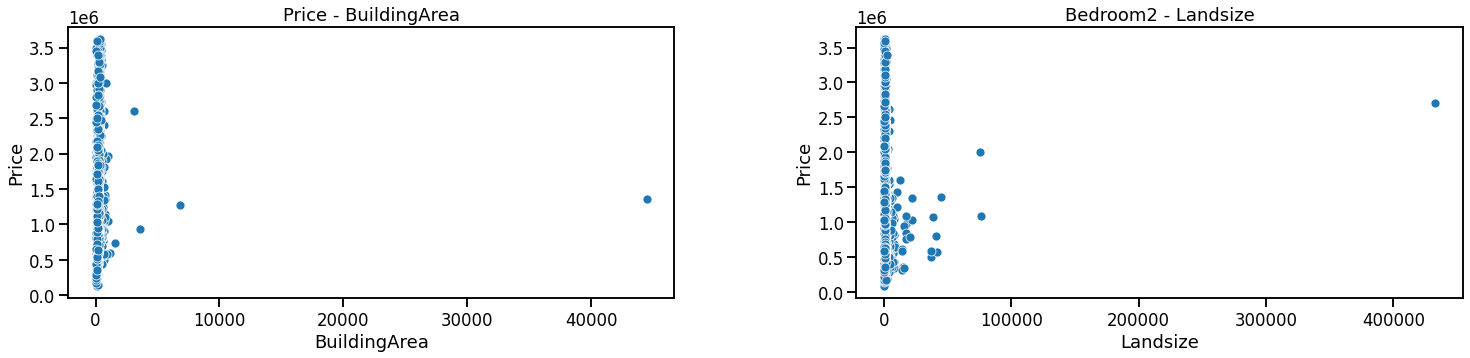

In [ ]:
# YearBuilt:
fig = plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
sns.scatterplot(x = melb_df_filtro["BuildingArea"], y = melb_df_filtro["Price"])
plt.title("Price - BuildingArea")

plt.subplot(1,2,2)
sns.scatterplot(x = melb_df_filtro["Landsize"], y = melb_df_filtro["Price"])
plt.title("Bedroom2 - Landsize")

plt.subplots_adjust(wspace = 0.3, hspace = 0.3) 
plt.show()

* La variable Propertycount no presenta relacion con el precio ya que su correlación es de tan solo un -0.05. No se incluirá en el análisis ya que no aportará información relevante para predecir el precio de una propiedad.  


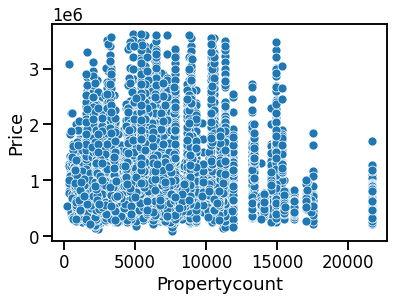

In [ ]:
# PropertyCount
sns.scatterplot(data = melb_df_filtro, x = "Propertycount", y = "Price")

En cuanto a las demás variables, las categoricas, resultaria util explorarlas para analizar si la información que aportan justifica dejarlas en el set de datos. 

* Variable `Type`: el tipo de propiedad con mayor cantidad de datos y precio promedio mas alto en el dataset es "h" (house, cottage, etc), seguido por "u" (unit) en cantidad de datos pero la de menor precio promedio y, por ultimo, "t" (townhouse) en relacion a los casos que registra pero con un precio promedio mayor que "u". 

  A su vez, en el grafico "Distribución Precio por tipo de vivienda y Region" se observa que el precio de h presenta una dispersión menor que el de u y t. 

In [ ]:
# Cantidad de cada tipo de propiedad en el dataset: 
melb_df_filtro["Type"].value_counts()

h    9179
u    3013
t    1114
Name: Type, dtype: int64

* Analizar a la variable `Regionname` y el precio en cada zona por tipo de propiedad, nos indica si la zona en que esta ubicada la propiedad tiene propiedades con precios elevados (quizas por motivos de seguridad, espacios verdes, comercios, etc), lo que aporta información relevante al analisis. 

 A partir del gráfico siguiente podemos advertir que las propiedades con precios más elevados son las del tipo h y t ubicadas en la zona SoutherMetropolitan. Por otro lado la zona de Estearn Victoria concentra los precios más bajos para las propiedades del tipo unit mientras que Western Victoria es la zona con menores precios para las viviendas del tipo h. Al cruzar la variable Type con regionname podemos identificar con mayor claridad que relacion tiene cada una con la variable precio.

In [ ]:
# Distribución Precio por tipo de vivienda y Region.
import plotly.express as px

fig = px.box(melb_df_filtro, x="Type", y="Price",color='Regionname')
fig.update_layout(
 title='Distribución de precio según tipo de vivienda y Region',
 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(zeroline=False, gridcolor='white'),
    paper_bgcolor='rgb(233,233,233)',
)


fig.show()


#### 1.2.1 Consigna 2 (A). 

**Justificar cada columna no seleccionada.**

En principio las variables que no se considerán en el análisis a partir de aqui son:  `Bedroom2`, `Method`, `Seller`, `Address`, `BuildingArea`, `Landsize`, `PropertyCount`, `Lattitude` y `Longtitude`. A partir de la sección anterior podemos justificar la exclusión de la mismas. A continuación un breve resumen: 

* `Bedroom2`: correlación alta con la variable Rooms por lo que aportan información similar, sumado a que Bedroom2 proviene de otro sitio. 
* `Method`: el metodo de venta no parece aportar información relevante para el precio de la propiedad. 
* `Seller`: tiene muchos valores categoricos y haciendo un análisis lógico sería muy dificil que la persona encargada de la venta tenga influencia sobre el precio.
* `Address`, `Lattitude` y `Longtitude`: una ubicación tan precisa de la propiedad probablemente no aporte demasiado al análisis. Existe otro tipo de referencias más util para localizar a la propiedad (CouncilArea, Suburb, Regionname, Postcode). 
* `BuildingArea` y `Landsize`: no muestran una correlación alta con el precio, además de exhibir distribuciones con muchos valores extremos. En particular, BuildingArea cuenta con numerosos valores faltantes. 
* `PropertyCount`: correlación baja con el precio, no aporta información relevante al análisis. 

In [ ]:
# Eliminamos las variables irrelevantes: 
df = melb_df_filtro.drop(["Bedroom2", "Method", "SellerG", "Address", "BuildingArea", "Landsize", "Propertycount", "Lattitude", "Longtitude"], axis = 1)

In [ ]:
# A partir de aqui trabajamos con un dataframe de: 
df.shape

(13306, 12)

#### 1.2.2 Consigna 2 (B). 

**Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros**

Las variables categoricas que tenemos en el dataset son: `Suburb`, `Type`, `Postcode`, `CouncilArea`, `Regionname`. Suburb y Postcode pueden adoptar muchos valores unicos y por ello se establece un criterio minimo de cantidad para evitar trabajar con muchas categorias sin demasiados valores. En base a obtener cuanto representa la cantidad de valores de una categoria en el total, se obtiene el numero minimo para generar una categoria "Otro" que incluya a los valores cuya ocurrencia en el set de datos sea menor. 

El criterio en este caso es bastante "a ojo", lo que se intenta es mantener una cantidad de valores unicos razonable para evitar "perder" ese dato en la categoria Otro. 

In [ ]:
# Se seleccionan variables categoricas: 
col_categ = list(df.select_dtypes(include = ["object"]).columns)

# Se obtiene % de cada valor en el total: 
suburbio = df['Suburb'].value_counts()/df['Suburb'].count()
type_prop = df['Type'].value_counts()/df['Type'].count()
postcode = df['Postcode'].value_counts()/df['Postcode'].count()
council_area = df['CouncilArea'].value_counts()/df['CouncilArea'].count()
region = df['Regionname'].value_counts()/df['Regionname'].count()

# Criterio de filtro: 

  # Suburbio : se agrupan en la categoria "Otro" a aquellos barrios que cuentan con menos de 50 registros (0.3% del dataset)
df['Suburb'] = np.where(df["Suburb"].isin(list(suburbio[suburbio < (50/len(df))].index)), "Otro", df["Suburb"])
print("Cant valores unicos Suburb: ", len(df['Suburb'].unique())) # De 314 valores pasa a 91

  # Postcode : se agrupan en la categoria "Otro" a aquellos postcode que cuenten con menos de 50 registros (0.3% del dataset)
df['Postcode'] = np.where(df["Postcode"].isin(list(postcode[postcode < (50/len(df))].index)), 0, df["Postcode"])
print("Cant valores unicos Postcode: ", len(df['Postcode'].unique())) # De 198 valores pasa a 86

Cant valores unicos Suburb:  91
Cant valores unicos Postcode:  86


### 1.3 Consigna 3. 

**Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico**

Obs: se añade la variable `amenities` a la lista de columnas que se consideran relevantes del conjunto de datos de AirBnB. 

In [ ]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv

interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude', 'amenities']

airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv', usecols=interesting_cols)

In [ ]:
# Aspectos descriptivos: 
print("Tamaño: ", airbnb_df.shape)
print("Columnas: ", airbnb_df.columns)
airbnb_df[:3]

Tamaño:  (22895, 14)
Columnas:  Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude',
       'amenities', 'price', 'weekly_price', 'monthly_price'],
      dtype='object')


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,amenities,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,"{Internet,Wifi,""Pets live on this property"",Do...",60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",159,1253.0,4452.0


#### 1.3.1 Consigna 3 (A)

**Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna price, o aplicar múltiples transformaciones como la mediana o el mínimo.**

Se agregará información del precio de la propiedad.

In [ ]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude',
       'amenities', 'price', 'weekly_price', 'monthly_price'],
      dtype='object')

In [ ]:
airbnb_df_1 = airbnb_df[["price", "zipcode"]]

#### 1.3.2 Consigna 3 (B)

**Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.**

Si solo se utiliza la variable zipcode (o Postcode) la unión de ambos dataframes aumenta notablemente la cantidad de registros con la que se trabajaria ya que no existe una equivalencia univoca entre ambos, un zipcode es igual en varias propiedades. Lo que resulta en que para cada zipcode en el dataframe inicial se agrega la información de todos los zipcode iguales que se encuentran en el de airbnb. 

Es por ello que se necesitaria realizar el merge sobre variables adicionales que nos permitan identificar de forma unica a cada propiedad (mayor detalle en punto C). 

Una forma de resolver esto, en principio es agregar al dataset el precio promedio por zipcode, de forma que los registros no se dupliquen. 

In [ ]:
# No se incluyen los Zipcode que tengan menos de 50 registros: 
zipcode_airbnb = airbnb_df_1['zipcode'].value_counts()/airbnb_df_1['zipcode'].count()
airbnb_df_1 = airbnb_df_1[~(airbnb_df_1['zipcode'].isin(zipcode_airbnb[zipcode_airbnb < (50/len(df))].index))]
airbnb_df_1.shape

(15409, 2)

In [ ]:
# Homogeneizamos datos de Melbourne y los provenientes de Airbnb:  
airbnb_df_1 = airbnb_df_1.rename(columns = {"zipcode" : "Postcode"})
df = df.rename(columns = {"Lattitude": "latitude", "Longtitude" : "longitude"})
df["Postcode"] = df["Postcode"].apply(float).apply(int).apply(str)
airbnb_df_1 = airbnb_df_1.dropna()
airbnb_df_1 = airbnb_df_1[airbnb_df_1["Postcode"] != "0"]
airbnb_df_1["Postcode"] = airbnb_df_1["Postcode"].apply(int).apply(str)

In [ ]:
# Agrupo cada zipcode y obtengo el precio promedio por cada uno
airbnb_price_by_zipcode = airbnb_df_1.groupby('Postcode')\
  .agg({'price': ['mean', 'count']})\
  .reset_index()
# Muestro la estructura del df
airbnb_price_by_zipcode[:3]

Postcode       price      
                  mean count
0     3000  150.504307  3367
1     3002  200.979695   197
2     3003  128.458333   216

In [ ]:
# Me quedan dos niveles por columna, lo corrijo.
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]

airbnb_price_by_zipcode[:3]

,Postcode,price mean,price count
0,3000,150.504307,3367
1,3002,200.979695,197
2,3003,128.458333,216


In [ ]:
# Merge
df_merge = df.merge(
    airbnb_price_by_zipcode, how='left',
    on='Postcode')

In [ ]:
df_merge = df_merge.drop("price count", axis = 1)

#### 1.3.3 Consigna 3 (C)

**Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.**

Como ya se menciono anteriormente, se requieren variables adicionales sobre las cuales realizar el merge para que se añada información de forma correcta. Estas variables deben identificar de forma unica a la propiedad, por lo que las variables candidatas son longtitude y latitude, ya que nos da las coordenadas de ubicación exacta de la propiedad. Sin embargo, estas variables requieren tratamiento profundo ya que puede ocurrir que haya diferencias minimas en las coordenadas y surge la pregunta de si realmente es la misma propiedad o no. 

Otra variable que nos permitiria identificar de forma unica a la propiedad es su dirección (variable `Address` en el dataframe inicial), sin embargo, en el dataframe de Airbnb no se cuenta con dicha información sino solo con la calle `Street`. En ese caso, se podria solo tomar la calle y analizar cuantos casos se tienen en los que exista mas de una propiedad en una misma calle. Sino son demasiados, se podria analizar a partir de alli las coordenadas de ubicación para determinar si son la misma propiedad o no lo son. 

Dado que la identificación unica de las propiedades lleva un trabajo exhaustivo, no se puede en este caso añadir información del entorno de la propiedad (variables `description` y `amenities`). 

## Ejercicio 2

### 2.1 Consigna 1.

**Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).**



In [ ]:
# Cantidad de valores faltantes a reemplazar en CouncilArea
df_merge[["CouncilArea", "Suburb"]].isna().sum()

CouncilArea    1283
Suburb            0
dtype: int64

In [ ]:
# Obtenemos un mapeo que indique a que CouncilArea pertenece cada suburbio.
group_mapeo = df_merge.groupby(["Suburb", "CouncilArea"])["Price"].mean() # Price elegida como variable para visualizar el agrupamiento.
mapeo = dict(group_mapeo.index) 

In [ ]:
# Se reemplazan los valores faltantes con los valores obtenidos a partir del mapeo.
df_merge["CouncilArea"] = np.where(df_merge.index.isin(df_merge[df_merge["CouncilArea"].isna()].index), df_merge["Suburb"].map(mapeo), df_merge["CouncilArea"])

In [ ]:
# Cantidad de valores faltantes luego del mapeo:
df_merge["CouncilArea"].isna().sum()

0

### 2.2 Consigna 2. 

**Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.**


In [ ]:
# Cantidad de valores faltantes de la columna añadida en el df: 
df_merge["price mean"].isna().sum()

9664

In [ ]:
# Imputamos los valores faltantes del precio promedio por postcode añadido de Airbnb con la media:
df_merge["price mean"] = df_merge["price mean"].replace(np.nan, df_merge["price mean"].mean())

In [ ]:
# Cantidad de valores faltantes luego de la imputacion:
df_merge["price mean"].isna().sum()

0

## Ejercicio 3





### 3.1 Consigna 1. 

**Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Creamos un csv con el dataframe final: 
df_merge.to_csv("/content/drive/My Drive/Curación y Exploración de datos/melb_df_transform.csv", index = False)

Mounted at /content/drive
